In [1]:
#analytics
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from entropy_python_library.entropy.entropy import *
import mass_ts as mts
from scipy.io import arff

import stumpy
# visuals
import matplotlib.pyplot as plt

/Users/tortysivill/.pyenv/versions/3.7.3/envs/entropy/lib/python3.7/site-packages/mass_ts/_mass_ts.py:18: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  'GPU support will not work. You must pip install mass-ts[gpu].')


In [2]:
import complexityparameters

## Import Condition Data

In [3]:
path = "data/useful/DodgerLoopGame/"

In [4]:
data = arff.loadarff(path+'DodgerLoopGame_TRAIN.arff')
print(len(data))
df_data = pd.DataFrame(data[0])

df_data.head()

data_test = arff.loadarff(path+'DodgerLoopGame_TEST.arff')
df_data_test = pd.DataFrame(data_test[0])

2


In [5]:
df_data = df_data.dropna()
df_data_test = df_data_test.dropna()

In [6]:
Xtrain = df_data.drop(columns=['target']).values
ytrain = df_data['target']

Xtest = df_data_test.drop(columns=['target']).values
ytest = df_data_test['target']

In [7]:
ytrain

0     b'1'
1     b'1'
2     b'1'
3     b'1'
4     b'1'
5     b'1'
6     b'1'
8     b'1'
9     b'1'
10    b'2'
11    b'2'
12    b'2'
13    b'2'
14    b'2'
16    b'2'
17    b'2'
18    b'2'
Name: target, dtype: object

In [8]:
len(Xtrain)

17

In [9]:
len(Xtest)

127

In [10]:
temp_list = []

for x in Xtrain:
    temp_list.append(x)

for x in Xtest:
    temp_list.append(x)
    
len(temp_list)
training_data_raw = temp_list.copy()

In [11]:
temp_list = []

for x in ytrain:
    temp_list.append(x)

for x in ytest:
    temp_list.append(x)

y = temp_list.copy()
len(y)

144

In [12]:
len(training_data_raw[0])

288

In [13]:
count = 0
for item in y:
    if item == b'1':
        count = count + 1
        
print(count)

74


In [14]:
y

[b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',
 b'2',

In [15]:
def normalise(X):
    return [(x - min(X))/(max(X)-min(X)) for x in X]

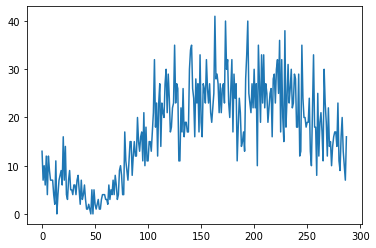

In [16]:
plt.plot(training_data_raw[25])

## Import Control Data

### Extracting the following features from selected data

<ol>
<li>Mean Activity Level</li>
<li>Standard Deviation</li>
<li> Trimmed Mean </li>
</ol>

## Aggregate Features

## Parameter Suite

In [17]:
normalised_complexity_feature_df = complexityparameters.normalised_complexity_features(training_data_raw)

In [18]:
normalised_summary_feature_df = complexityparameters.normalised_summary_features(training_data_raw)

In [19]:
normalised_all_feature_df = complexityparameters.normalised_all_features(training_data_raw)

In [20]:
normalised_summary_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
normalised_summary_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])
#normalised_summary_feature_df['complexity_feature'] = get_features(150, 1)

### Models 

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    KNeighborsClassifier(1),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


### results from each complexity parameter and all summary features

In [86]:
from sklearn.ensemble import RandomForestClassifier

temp_summary_feature_df = normalised_summary_feature_df.copy()

rfc = RandomForestClassifier()
print(rfc)
for column in normalised_complexity_feature_df:
    temp_summary_feature_df['complexity_feature'] = normalised_complexity_feature_df[[column]]
    X = temp_summary_feature_df.dropna(axis='columns').values
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(column)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))


RandomForestClassifier()
lempel_ziv
[0.87428571]
[0.87897354]
[0.88142857]
[0.88060305]
[0.06069141]
[0.06375098]
[0.0536407]
[0.06958964]
approx
[0.87571429]
[0.89769709]
[0.86761905]
[0.8807897]
[0.08810039]
[0.07214189]
[0.05741206]
[0.06235343]
sample
[0.86857143]
[0.88172487]
[0.88904762]
[0.8667703]
[0.07628565]
[0.07195599]
[0.06153921]
[0.07818174]
permutation
[0.88952381]
[0.89693013]
[0.86809524]
[0.8592937]
[0.06078847]
[0.07880964]
[0.0641374]
[0.07543062]
spectral
[0.89571429]
[0.90881614]
[0.8752381]
[0.88755818]
[0.05477019]
[0.05145061]
[0.07192841]
[0.06279228]
skewness
[0.8747619]
[0.88100132]
[0.88095238]
[0.89483298]
[0.06704146]
[0.05714664]
[0.05561448]
[0.05518231]
kurtosis
[0.86857143]
[0.90395503]
[0.8752381]
[0.87392396]
[0.08716237]
[0.06323601]
[0.07870263]
[0.06739921]
SVD
[0.86]
[0.89375553]
[0.88142857]
[0.88045195]
[0.07063688]
[0.07970394]
[0.0536407]
[0.06180342]


### Results from ALL features

In [87]:
from sklearn.ensemble import RandomForestClassifier

temp_all_feature_df = normalised_all_feature_df.copy()
temp_all_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
temp_all_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])

X = temp_all_feature_df.dropna(axis='columns').values
rfc = RandomForestClassifier()
print(rfc)
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.86857143]
[0.89727116]
[0.86809524]
[0.87377286]
[0.08640463]
[0.05372023]
[0.0641374]
[0.05930919]


### Dont want all features - curse of dimensionality and not very intepretable - lets try and think more about our features

In [23]:
import seaborn as sn

#### lets plot correlation for the complexity features

In [24]:
corrMatrix = normalised_complexity_feature_df.corr()

#### visualise correlation matrix

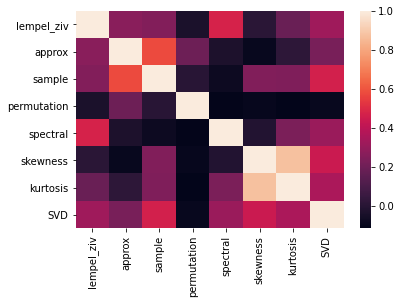

In [25]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [26]:
### lets plot correlation for the summary features (first half)

In [27]:
corrMatrix = normalised_summary_feature_df.iloc[:, 0:10].corr()

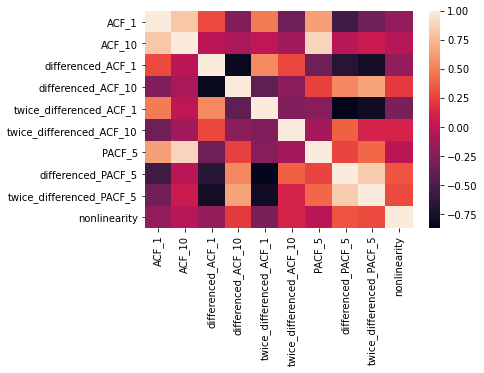

In [28]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

#### lets plot correlation for the summary features (second half)

In [29]:
corrMatrix = normalised_summary_feature_df.iloc[:, 10:].corr()

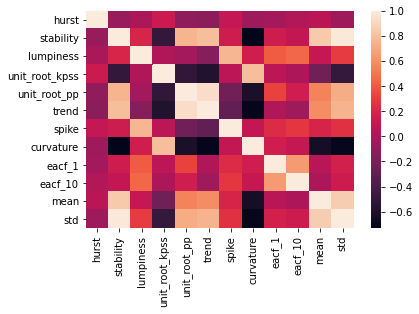

In [30]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [31]:
#### lets plot correlation for the summary features (second half)

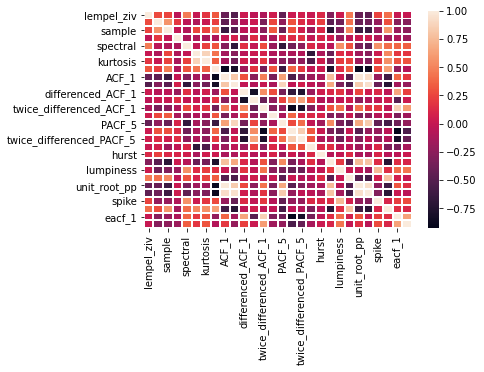

In [32]:
corrMatrix = normalised_all_feature_df.corr()
sn.heatmap(corrMatrix, annot=False, linewidths=1.)
plt.savefig('correlation_matrix.eps')
plt.show()

### Feature Importances

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

model = RandomForestClassifier().fit(X_train, y_train)
print(model.score(X_val, y_val))

0.8888888888888888


### Permutation Feature Importance

In [34]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

Depresjon_feature_names = temp_all_feature_df.dropna(axis='columns').columns
for i in r.importances_mean.argsort()[::-1]:
    print(f"{Depresjon_feature_names[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

lumpiness0.051 +/- 0.035
differenced_PACF_50.037 +/- 0.023
spike   0.025 +/- 0.026
nonlinearity0.023 +/- 0.026
mean    0.016 +/- 0.019
std     0.015 +/- 0.019
eacf_10 0.015 +/- 0.014
sample  0.010 +/- 0.017
stability0.006 +/- 0.012
permutation0.006 +/- 0.011
twice_differenced_ACF_10.002 +/- 0.017
trend   0.000 +/- 0.000
ACF_1   0.000 +/- 0.000
differenced_ACF_100.000 +/- 0.000
PACF_5  -0.005 +/- 0.010
eacf_1  -0.007 +/- 0.016
unit_root_kpss-0.007 +/- 0.037
ACF_10  -0.009 +/- 0.017
twice_differenced_ACF_10-0.010 +/- 0.017
curvature-0.011 +/- 0.027
differenced_ACF_1-0.012 +/- 0.014
approx  -0.012 +/- 0.014
twice_differenced_PACF_5-0.015 +/- 0.014
skewness-0.018 +/- 0.021
unit_root_pp-0.019 +/- 0.013
lempel_ziv-0.025 +/- 0.008
SVD     -0.027 +/- 0.005
kurtosis-0.027 +/- 0.024


### LIME

21-Feb-26 15:56:03 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.
21-Feb-26 15:56:03 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 28 features with highest weights.


{'condition': {'0.31 < *lempel_ziv* <= 0.46': 0.04868131777309331, '0.71 < *approx* <= 0.77': 9.128540736216298e-06, '0.43 < *sample* <= 0.52': -0.010447226501012197, '0.65 < *permutation* <= 0.79': 0.0997780050684063, '*skewness* <= 0.14': -0.014844257834648725, '0.03 < *kurtosis* <= 0.05': 0.017431535492452126, '*SVD* <= 0.26': 0.011169549138262392, '0.78 < *ACF_1* <= 0.83': -0.03414775123436264, '0.75 < *ACF_10*': -0.0038321968586986755, '*differenced_ACF_1* <= 0.31': -0.00043760080131103924, '0.43 < *differenced_ACF_10*': -0.0019159404337853658, '0.37 < *twice_differenced_ACF_1* <= 0.50': 0.010453264571894652, '0.18 < *twice_differenced_ACF_10* <= 0.33': 0.06049198533168635, '0.74 < *PACF_5*': -0.024510728114946666, '0.62 < *differenced_PACF_5*': 0.029328286311536788, '0.66 < *twice_differenced_PACF_5*': -0.05203439326641411, '0.40 < *nonlinearity*': 0.0027175365941231574, '0.53 < *stability* <= 0.64': -0.07894072669422157, '0.04 < *lumpiness* <= 0.06': -0.056103339763320825, '0.31

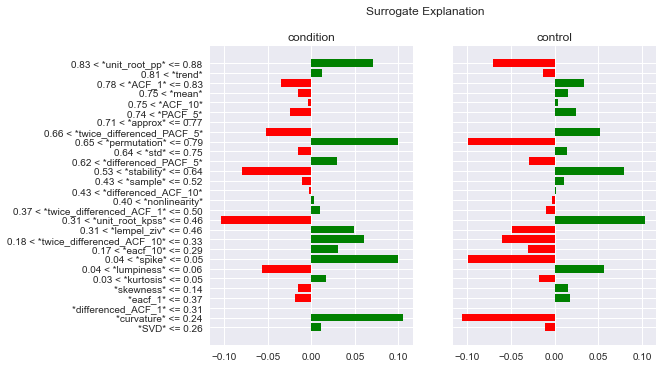

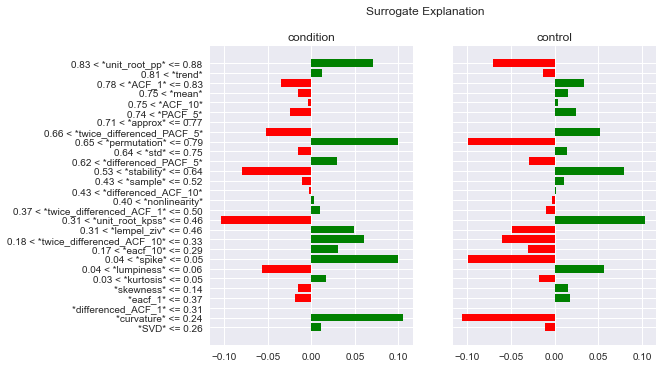

In [35]:
import fatf.transparency.predictions.surrogate_explainers as fatf_surrogates
import fatf.vis.lime as fatf_vis_lime

Depresjon_class_names = ['condition','control']
lime = fatf_surrogates.TabularBlimeyLime(
    X_train,
    model,
    feature_names=list(Depresjon_feature_names),
    class_names=Depresjon_class_names)

# Choose an index of the instance to be explained
index_to_explain = 0

# Explain an instance
lime_explanation = lime.explain_instance(
    X_train[index_to_explain, :], samples_number=50)

# Display the textual explanation
print(lime_explanation)

# Plot the explanation
fatf_vis_lime.plot_lime(lime_explanation)

In [36]:
### SHAP

In [51]:
ytrain

0     b'1'
1     b'1'
2     b'1'
3     b'1'
4     b'1'
5     b'1'
6     b'1'
8     b'1'
9     b'1'
10    b'2'
11    b'2'
12    b'2'
13    b'2'
14    b'2'
16    b'2'
17    b'2'
18    b'2'
Name: target, dtype: object

In [55]:
yTrain = []

for res in ytrain:
    if res == b'1':
        yTrain.append(0)
    else:
        yTrain.append(1)

In [136]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(normalised_all_feature_df.dropna(axis='columns').values, yTrain)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(normalised_all_feature_df.dropna(axis='columns').values)
shap.summary_plot(shap_values, normalised_all_feature_df.dropna(axis='columns').values, normalised_all_feature_df.dropna(axis='columns').columns )

ValueError: Found input variables with inconsistent numbers of samples: [144, 17]

In [64]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(normalised_all_feature_df.dropna(axis='columns').columns,vals)),columns=['col_name','feature_importance_vals'])

feature_importance['feature_importance_mean'] = np.mean(feature_importance['feature_importance_vals'])

feature_importance.sort_values(by=['feature_importance_mean'],ascending=False,inplace=True)
feature_importance.head()


top_5_features = feature_importance['col_name'][0:5].values
top_10_features = feature_importance['col_name'][0:10].values
top_15_features = feature_importance['col_name'][0:15].values
top_20_features = feature_importance['col_name'][0:20].values
top_25_features = feature_importance['col_name'][0:25].values
all_features = feature_importance['col_name'].values

feature_combinations = [top_5_features, top_10_features, top_15_features, top_20_features, top_25_features, all_features]

ValueError: Length of values does not match length of index

### Top Features Results

In [43]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

for feature_combination in feature_combinations:
    temp_summary_feature_df = normalised_all_feature_df.copy()
    X = temp_summary_feature_df[feature_combination].values
    #top 10 features
    #X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(feature_combination)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))

['spike' 'lumpiness' 'curvature' 'unit_root_kpss' 'stability']
[0.85285714]
[0.87840608]
[0.86666667]
[0.87359351]
[0.10775907]
[0.09601092]
[0.09311929]
[0.09478915]
['spike' 'lumpiness' 'curvature' 'unit_root_kpss' 'stability' 'kurtosis'
 'nonlinearity' 'differenced_PACF_5' 'eacf_1' 'ACF_10']
[0.88238095]
[0.88005952]
[0.86809524]
[0.86636902]
[0.05997165]
[0.07735108]
[0.0641374]
[0.05661198]
['spike' 'lumpiness' 'curvature' 'unit_root_kpss' 'stability' 'kurtosis'
 'nonlinearity' 'differenced_PACF_5' 'eacf_1' 'ACF_10' 'skewness'
 'twice_differenced_ACF_10' 'ACF_1' 'sample' 'eacf_10']
[0.88238095]
[0.91155688]
[0.86809524]
[0.8592937]
[0.05997165]
[0.05980029]
[0.08313718]
[0.07543062]
['spike' 'lumpiness' 'curvature' 'unit_root_kpss' 'stability' 'kurtosis'
 'nonlinearity' 'differenced_PACF_5' 'eacf_1' 'ACF_10' 'skewness'
 'twice_differenced_ACF_10' 'ACF_1' 'sample' 'eacf_10' 'PACF_5'
 'unit_root_pp' 'twice_differenced_ACF_1' 'lempel_ziv' 'trend']
[0.84714286]
[0.88886376]
[0.8671428

## Just Summary Features

In [44]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

temp_summary_feature_df = normalised_summary_feature_df.copy()
X = temp_summary_feature_df.dropna(axis='columns').values
#top 10 features
#X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(feature_combination)
print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

['spike' 'lumpiness' 'curvature' 'unit_root_kpss' 'stability' 'kurtosis'
 'nonlinearity' 'differenced_PACF_5' 'eacf_1' 'ACF_10' 'skewness'
 'twice_differenced_ACF_10' 'ACF_1' 'sample' 'eacf_10' 'PACF_5'
 'unit_root_pp' 'twice_differenced_ACF_1' 'lempel_ziv' 'trend' 'SVD'
 'permutation' 'approx' 'twice_differenced_PACF_5' 'differenced_ACF_1'
 'differenced_ACF_10']
[0.88904762]
[0.89507672]
[0.84714286]
[0.87335506]
[0.06838102]
[0.06455628]
[0.06572291]
[0.07356233]


In [ ]:
### interpretable

In [122]:
temp_summary_feature_df = normalised_summary_feature_df.copy()

X = temp_summary_feature_df.dropna(axis='columns')
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

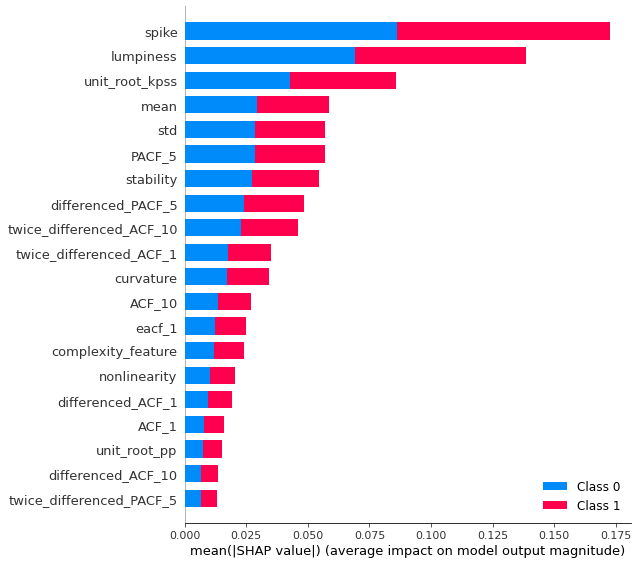

In [137]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(X_val.values, y_val)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val.values)
shap.summary_plot(shap_values, X_val.values, normalised_summary_feature_df.dropna(axis='columns').columns )

In [138]:

X_selected = X_train[['complexity_feature','lumpiness','spike','twice_differenced_ACF_10','spike']]


rfc = RandomForestClassifier()

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

[0.75545455]
[0.76822511]
[0.72727273]
[0.74366495]
[0.15504998]
[0.19150081]
[0.16241972]
[0.18960674]


### My Features

In [22]:
window_size_parameter = 150

In [23]:
def DP_entropy(x,window): 
    time_series = np.array(x,dtype=float)
    matrix_profile = stumpy.stump(time_series, m=window)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy = -np.sum([(x/distance_sum)*np.log(x/distance_sum) for x in df_matrix_profile['distances']])
    return entropy

In [24]:
from scipy import signal

def DP_flatness_motif(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:10]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    #entropy = entropy/(distance_sum/len(top_motifs['distances']))
    return entropy

In [25]:
from scipy import signal

def DP_flatness(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy_sum = np.sum([np.log(x) for x in df_matrix_profile['distances']])
    entropy = entropy_sum * 1/len(df_matrix_profile['distances'])
    entropy = np.exp(entropy)
    entropy = entropy/(distance_sum/len(df_matrix_profile['distances']))
    return entropy

In [26]:
def sequential_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['left_index']= matrix_profile[:,1]
    a_s = len(df_matrix_profile.index)
    for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] == df_matrix_profile['left_index'].iloc[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [27]:
top_features = ['complexity_feature', 'curvature', 'lumpiness', 'spike', 'nonlinearity', 'unit_root_kpss']
top_features = ['complexity_feature', 'mean', 'std']

In [28]:
from scipy.stats import skew
from scipy.stats import kurtosis

def get_features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    return normalise(entropy_feature)
   #return(temp_summary_feature_df[['complexity_feature', 'mean', 'std']].values)


In [29]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #return(temp_summary_feature_df.dropna(axis='columns'))
    return(temp_summary_feature_df[['complexity_feature','lumpiness','spike','twice_differenced_ACF_10','spike']].values)


In [30]:
## Results for DP Entropy

In [31]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,0) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.81142857]
[0.83310317]
[0.81190476]
[0.79439821]
[0.0855342]
[0.08417148]
[0.09048246]
[0.08148905]


In [32]:
### Results for DP Flatness

In [33]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)


accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.80571429]
[0.8443082]
[0.83285714]
[0.80801542]
[0.08181058]
[0.06795807]
[0.07915225]
[0.09285847]


In [34]:
### Results for Sequential Entropy

In [35]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()

print(rfc)


accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.79142857]
[0.82442268]
[0.79142857]
[0.78657898]
[0.08989286]
[0.08444496]
[0.0840257]
[0.08059353]


In [36]:
def calculate_DP(x):
    matrix_profile_A = stumpy.stump(x, m=80)
    matrix_profile_B = stumpy.stump(x, m=150)
    matrix_profile_C = stumpy.stump(x, m=120)
    matrix_profile_D = stumpy.stump(x, m=100)
    
    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)

    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        distance_profile.append(np.max([A_vary, B_vary, C_vary, D_vary])**2)
    return(distance_profile)


In [37]:
from scipy import signal

def DP_split_flatness(x,window):
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:20]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    return entropy

In [38]:
from scipy import signal

def DP_split_entropy(x,window):
    bins = 3
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    distance_sum = np.sum(df_matrix_profile['distances'])
    total = len(df_matrix_profile['distances'])
    categorical_object = pd.cut(df_matrix_profile['distances'], bins)
    counts = []
    for bini in range(0,bins):
        counts.append(categorical_object.value_counts().values[bini]/total)
    entropy = -np.sum([(c)*np.log(c) for c in counts])
    return entropy
    return entropy

In [39]:
def calculate_DP_Sequential(x):
    matrix_profile_A = stumpy.stump(x, m=10)
    matrix_profile_B = stumpy.stump(x, m=50)
    matrix_profile_C = stumpy.stump(x, m=150)
    matrix_profile_D = stumpy.stump(x, m=200)

    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)
    
    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        highest_index = np.argmax([A_vary, B_vary, C_vary, D_vary])
        if highest_index == 0:
            distance_profile.append(A[1])
        elif highest_index == 1:
            distance_profile.append(B[1])
        elif highest_index == 2:
            distance_profile.append(C[1])
        elif highest_index == 3:
            distance_profile.append(D[1]) 
    return(distance_profile)

In [40]:
def sequential_split_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    neighbour_indexes = calculate_DP_Sequential(time_series)
  
    a_s = len(neighbour_indexes)
    for x in range(0,len(neighbour_indexes)-1):
        if neighbour_indexes[x+1] == neighbour_indexes[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [41]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features2(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_split_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_split_entropy(x, window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #return(temp_summary_feature_df.dropna(axis='columns').values)
    #return(temp_summary_feature_df[['complexity_feature','mean','std']].values)
    return(temp_summary_feature_df[['complexity_feature','lumpiness','spike','twice_differenced_ACF_10','spike']].values)




In [42]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,0) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.77761905]
[0.82112638]
[0.79857143]
[0.78093889]
[0.05311392]
[0.06462436]
[0.08010905]
[0.06708324]


In [43]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.81333333]
[0.83797222]
[0.81285714]
[0.82527446]
[0.08491159]
[0.07755266]
[0.08126132]
[0.08757633]


In [44]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.79238095]
[0.80642857]
[0.79809524]
[0.810954]
[0.08084587]
[0.08081804]
[0.09602532]
[0.08776337]
